## **LangChain <> Arize - Product Documentation LLM Agent**

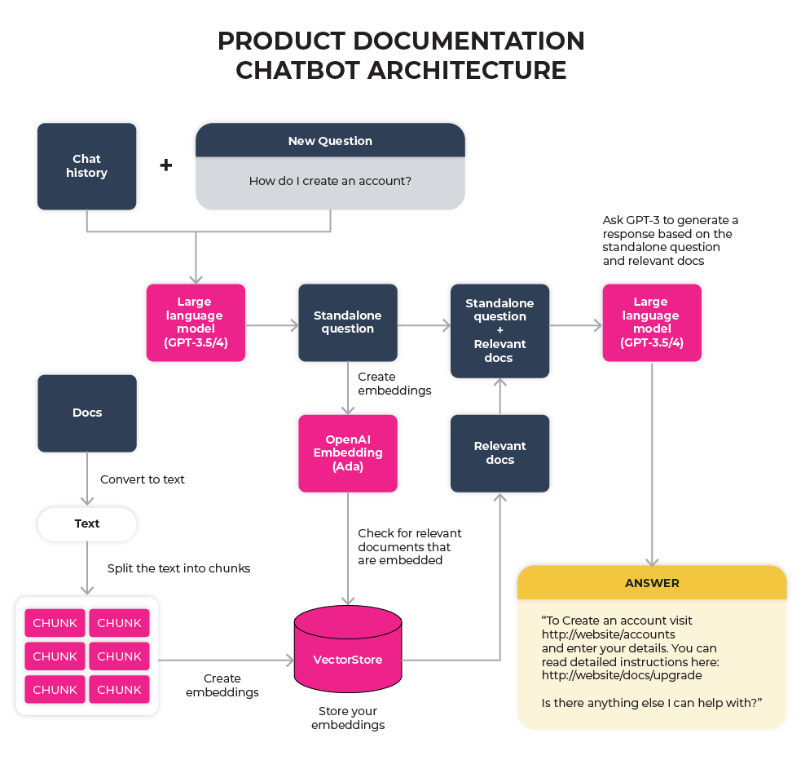

In [ ]:
%env OPENAI_API_KEY=

### Step 0. Install the Necessary Dependencies

In [ ]:
!pip3 install arize
!pip3 install langchain
!pip3 install openai
!pip3 install tiktoken
!pip3 install faiss-cpu
!pip3 install 'arize[AutoEmbeddings]'

In [ ]:
from langchain.document_loaders import GitbookLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.llms import OpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.agents.agent_toolkits import create_vectorstore_agent,VectorStoreToolkit,VectorStoreInfo
from langchain.callbacks import StdOutCallbackHandler
from langchain.callbacks.arize_callback import ArizeCallbackHandler
from langchain.callbacks.base import CallbackManager

### Step 1. Load Documentation Data and Split Into Chunks

In [ ]:
# Use LangChain documentation to load Arize doc data from gitbook
### Your Code Here #####


In [ ]:
# Define a text splitter function and split loaded data into chunks of 1500
### Your Code Here #####


### Step 2. Define vectorstore within LangChain

In [ ]:
# Define vectorstore using FAISS (Facebook AI Similarity Search) into a variable named "db"
### Your Code Here #####



In [ ]:
vectorstore_info = VectorStoreInfo(name="Arize Docs Store",description="Arize Gitbook Documentation VectorStore",vectorstore=db)
toolkit = VectorStoreToolkit(vectorstore_info=vectorstore_info)

### Step 3. Initialize and LLM Agent with Arize CallBack Handler

In [ ]:
# Define Arize Callback Handler
arize_callback = ArizeCallbackHandler(
model_id="llm-langchain-arize-docs",
model_version="1.0",
SPACE_KEY="xxxxxx",
API_KEY="xxxxxxxxxxx"
)

manager = CallbackManager([StdOutCallbackHandler(), arize_callback])

# Initiate agent from vectorstore and makesure callback_manager is passed in
agent_executor = create_vectorstore_agent(llm=OpenAI(temperature=0, callback_manager=manager, verbose=True),toolkit=toolkit,verbose=True)

### Step 4. Test your LLM Agent with questions

In [ ]:
# Run Agent --> This will log every prompt response pair into Arize
standalone_question = "Why does Arize use UMAP over t-SNE?"
result = agent_executor.run(standalone_question)